# Introduction

Welcome to *tntorch*! This notebook illustrates a few basic tensor manipulation and optimization use cases.

### First Example

In [1]:
import torch
torch.set_default_dtype(torch.float64)
import tntorch as tn

Let's create a 2D random tensor of size $128 \times 128$ and tensor train rank 10 (equivalent to a rank-10 matrix). The `requires_grad` flag tells PyTorch that this tensor should be optimizable:

In [2]:
t = tn.randn(128, 128, ranks_tt=10, requires_grad=True)
t

2D TT tensor:

 128 128
  |   |
 (0) (1)
 / \ / \
1   10  1

The spatial dimensions are shown above, the TT ranks are below, and the cores are listed as `(0)` and `(1)` in the middle.

In many ways, compressed tensors can be treated as if they were normal, uncompressed tensors:

In [3]:
print(tn.mean(t))
print(tn.var(t))
print(tn.norm(t))
print(tn.norm(t+t))
print(tn.norm(2*t))

tensor(0.0153, grad_fn=<DivBackward1>)
tensor(10.3761, grad_fn=<DivBackward1>)
tensor(412.3184, grad_fn=<SqrtBackward>)
tensor(824.6368, grad_fn=<SqrtBackward>)
tensor(824.6368, grad_fn=<SqrtBackward>)


To decompress a tensor into a `torch.Tensor`, we can use the function `torch()`:

In [4]:
print(t.torch().shape)

torch.Size([128, 128])


The function `numpy()` returns the same, just as a NumPy tensor. Let's use it to visualize the contents of our random tensor in *matplotlib*:

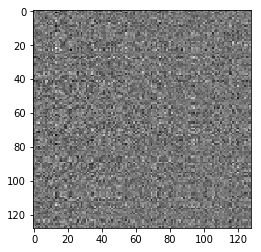

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(t.numpy(), cmap='gray')
plt.show()

To optimize tensors we can use *tntorch*'s helper function `optimize()`. 

Now, we will make our tensor zero over the top left quadrant by minimizing its norm:

iter: 0     | loss: 216.324445 | total time:    0.0011
iter: 500   | loss:  93.631189 | total time:    0.4329
iter: 1000  | loss:  19.823667 | total time:    0.9703
iter: 1322  | loss:   0.082656 | total time:    1.2697 <- converged (tol=0.0001)


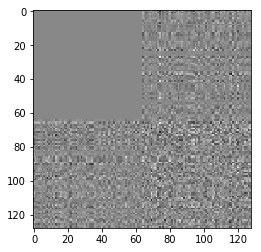

In [6]:
def loss(t):
    return tn.norm(t[:64, :64])

tn.optimize(t, loss)
plt.imshow(t.numpy(), cmap='gray')
plt.show()

### Second Example

Next, we will fit our tensor to be a rank-10 approximation of a grayscale image:

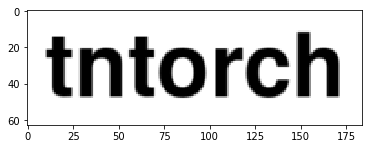

iter: 0     | loss: 197.608333 | total time:    0.0005
iter: 500   | loss:  29.738809 | total time:    0.6222
iter: 1000  | loss:  21.908585 | total time:    1.2766
iter: 1500  | loss:   9.171426 | total time:    1.8568
iter: 2000  | loss:   4.394665 | total time:    2.4462
iter: 2500  | loss:   2.824173 | total time:    3.0283
iter: 2688  | loss:   2.709813 | total time:    3.2575 <- converged (tol=0.0001)


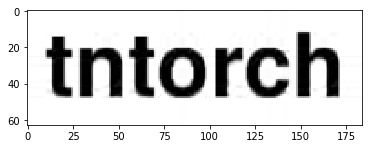

In [7]:
im = torch.DoubleTensor(plt.imread('../../images/text.png'))
plt.imshow(im.numpy(), cmap='gray')
plt.show()

t = tn.rand(im.shape, ranks_tt=10, requires_grad=True)

def loss(t):
    return tn.dist(t, im)  # Equivalent to torch.norm(t.torch() - im)

tn.optimize(t, loss)
plt.imshow(t.numpy(), cmap='gray', vmin=im.min(), vmax=im.max())
plt.show()

For other available tensor formats beyond plain TT, see [this notebook](main_formats.ipynb).